In [5]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

In [6]:
def load_dataset(): 
    sales = pd.read_excel("../sales.xlsx",header =1)
    view_rate = pd.read_excel("../view_rate.xlsx",header =1, index_col= 0)
    return sales, view_rate

sales = load_dataset()[0]
view_rate = load_dataset()[1]

In [7]:
sales.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0


In [8]:
view_rate.head()

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,
02:00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.003
02:01,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.005,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.012,0.003
02:02,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.005,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.004
02:03,0.0,0.0,0.014,0.0,0.0,0.0,0.0,0.0,0.0,0.005,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004
02:04,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.005,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004


# 데이터 전처리

In [9]:
## TODO 
## 1.무형 상품은 추정 제외 
## 2.결측된 노출분 채우기 (직전의 값 집어넣기) 
## 3. 판매단가 > 취급액이면 취급액 0 
##

def custom(price, total):
    # 3전처리 
    if price > total: return 0
    else: return total

def pre_processing(df): 
    # 1. 무형 상품 추정 제외 
    df = df.drop(df[df["상품군"]=="무형"].index,axis = 0)
    # 2. 결측된 노출분 채우기 
    for i,row in df.iterrows():
        val = row["노출(분)"]
        if i == 0:
            continue 
        if np.isnan(val):
            if df.loc[i,"방송일시"] == df.loc[i-1,"방송일시"]:
                df.loc[i,"노출(분)"] = df.loc[i-1,"노출(분)"]
            else :
                continue 
                
    # 3. 판매단가 > 취급액이면 취급액 0 
    df["취급액"] = df.apply(lambda x : custom(x["판매단가"], x["취급액"]),axis=1)
    print(sum((sales["판매단가"] > sales["취급액"]) & (sales['취급액'] != 0)))
    # 4. month, day, hour, minute, weekday 열 추가 
    df["방송일시"] = pd.to_datetime(df["방송일시"])
    df['month'] = pd.DatetimeIndex(df['방송일시']).month
    df['day'] = pd.DatetimeIndex(df['방송일시']).day
    df['hour'] = pd.DatetimeIndex(df['방송일시']).hour
    df['minute'] = pd.DatetimeIndex(df['방송일시']).minute
    df['weekday'] = pd.DatetimeIndex(df['방송일시']).weekday
    
    # reset_index
    df = df.reset_index(drop=True)
    
    return df 

sales = pre_processing(sales)
sales.head()

1990


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day,hour,minute,weekday
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,6,0,1
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,6,0,1
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,6,20,1
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,6,20,1
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,6,40,1


In [10]:
#  상품명을 기준으로 방송 노출 시간 feature 만들기
sales["방송노출시간"] = sales["노출(분)"].values


name_list = sales["상품명"].value_counts().index

for name in name_list:
    df = sales[sales["상품명"]==name]
    for i,index in enumerate(df.index):
        if i == len(df.index)-1:
            continue
        
        else:   
            next_ = df.index[i+1]
            try:
                if (sales.loc[index,"month"]==sales.loc[next_,"month"]) & (sales.loc[index,"day"]==sales.loc[next_,"day"]) & (sales.loc[index,"hour"]==sales.loc[next_,"hour"]) & (sales.loc[index,"minute"]!=sales.loc[next_,"minute"]):
                    sales.loc[next_,"방송노출시간"] = sales.loc[index,"방송노출시간"]+sales.loc[next_,"노출(분)"]
            except:
                continue
    
sales.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day,hour,minute,weekday,방송노출시간
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,6,0,1,20.0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,6,0,1,20.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,6,20,1,40.0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,6,20,1,40.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,6,40,1,60.0


## 공휴일 feature 추가 

In [11]:
from datetime import date 
#빨강날~ 
hol= ['2019-01-01'
,'2019-02-04'
,'2019-02-05'
,'2019-02-06'
,'2019-03-01'
,'2019-05-05'
,'2019-05-06'
,'2019-05-12'
,'2019-06-06'
,'2019-08-15'
,'2019-09-12'
,'2019-09-13'
,'2019-09-14'
,'2019-10-03'
,'2019-10-09'
,'2019-12-25',
'2020-01-01']
sales["방송일시"] = pd.to_datetime(sales["방송일시"])
sales["방송날짜"] = sales["방송일시"].apply(lambda x : str(date(x.year,x.month,x.day).isoformat()))
# 1이면 공휴일 아니면 0
sales['holiday']=(sales['방송날짜'].isin(hol)).astype(int)
sales.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day,hour,minute,weekday,방송노출시간,방송날짜,holiday
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,6,0,1,20.0,2019-01-01,1
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,6,0,1,20.0,2019-01-01,1
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,6,20,1,40.0,2019-01-01,1
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,6,20,1,40.0,2019-01-01,1
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,6,40,1,60.0,2019-01-01,1


In [12]:
# 판매량 feature
sales["판매량"] = sales["취급액"]/sales["판매단가"]

In [13]:
sales.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day,hour,minute,weekday,방송노출시간,방송날짜,holiday,판매량
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,6,0,1,20.0,2019-01-01,1,52.606516
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,6,0,1,20.0,2019-01-01,1,109.548872
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,6,20,1,40.0,2019-01-01,1,81.754386
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,6,20,1,40.0,2019-01-01,1,174.310777
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,6,40,1,60.0,2019-01-01,1,167.218045


## 노출분 소수점 반올림 feature 추가

In [14]:
sales['노출(분)반올림'] = sales['노출(분)'].round().astype(int)
sales

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day,hour,minute,weekday,방송노출시간,방송날짜,holiday,판매량,노출(분)반올림
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,6,0,1,20.0,2019-01-01,1,52.606516,20
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,6,0,1,20.0,2019-01-01,1,109.548872,20
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,6,20,1,40.0,2019-01-01,1,81.754386,20
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,6,20,1,40.0,2019-01-01,1,174.310777,20
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,6,40,1,60.0,2019-01-01,1,167.218045,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37367,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,12,31,23,40,1,40.0,2019-12-31,0,68.628378,20
37368,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,1,1,0,0,2,20.0,2020-01-01,1,286.117978,20
37369,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,1,1,0,0,2,20.0,2020-01-01,1,621.380952,20
37370,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,1,1,0,0,2,20.0,2020-01-01,1,87.120253,20


# Time series Analysis

### 전체 방송일시(2019년) 대한 취급액
#### 찾은점: 11월 12월에 취급액이 다른달에 비해 늘었지만 seasonality는 보이지 않는다

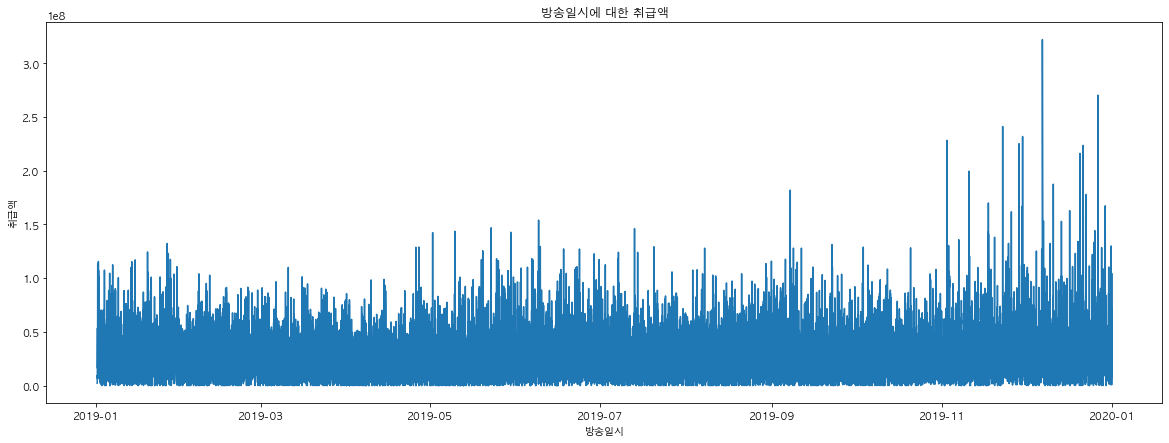

In [15]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(sales['방송일시'], sales['취급액'])
ax.set_xlabel('방송일시')
ax.set_ylabel('취급액')
ax.set_title('방송일시에 대한 취급액')
plt.show()


### 월별 방송일시에 대한 취급액
#### 찾은점: 2019년 안에 월끼리 비교했을때 일정한 패턴이 없음

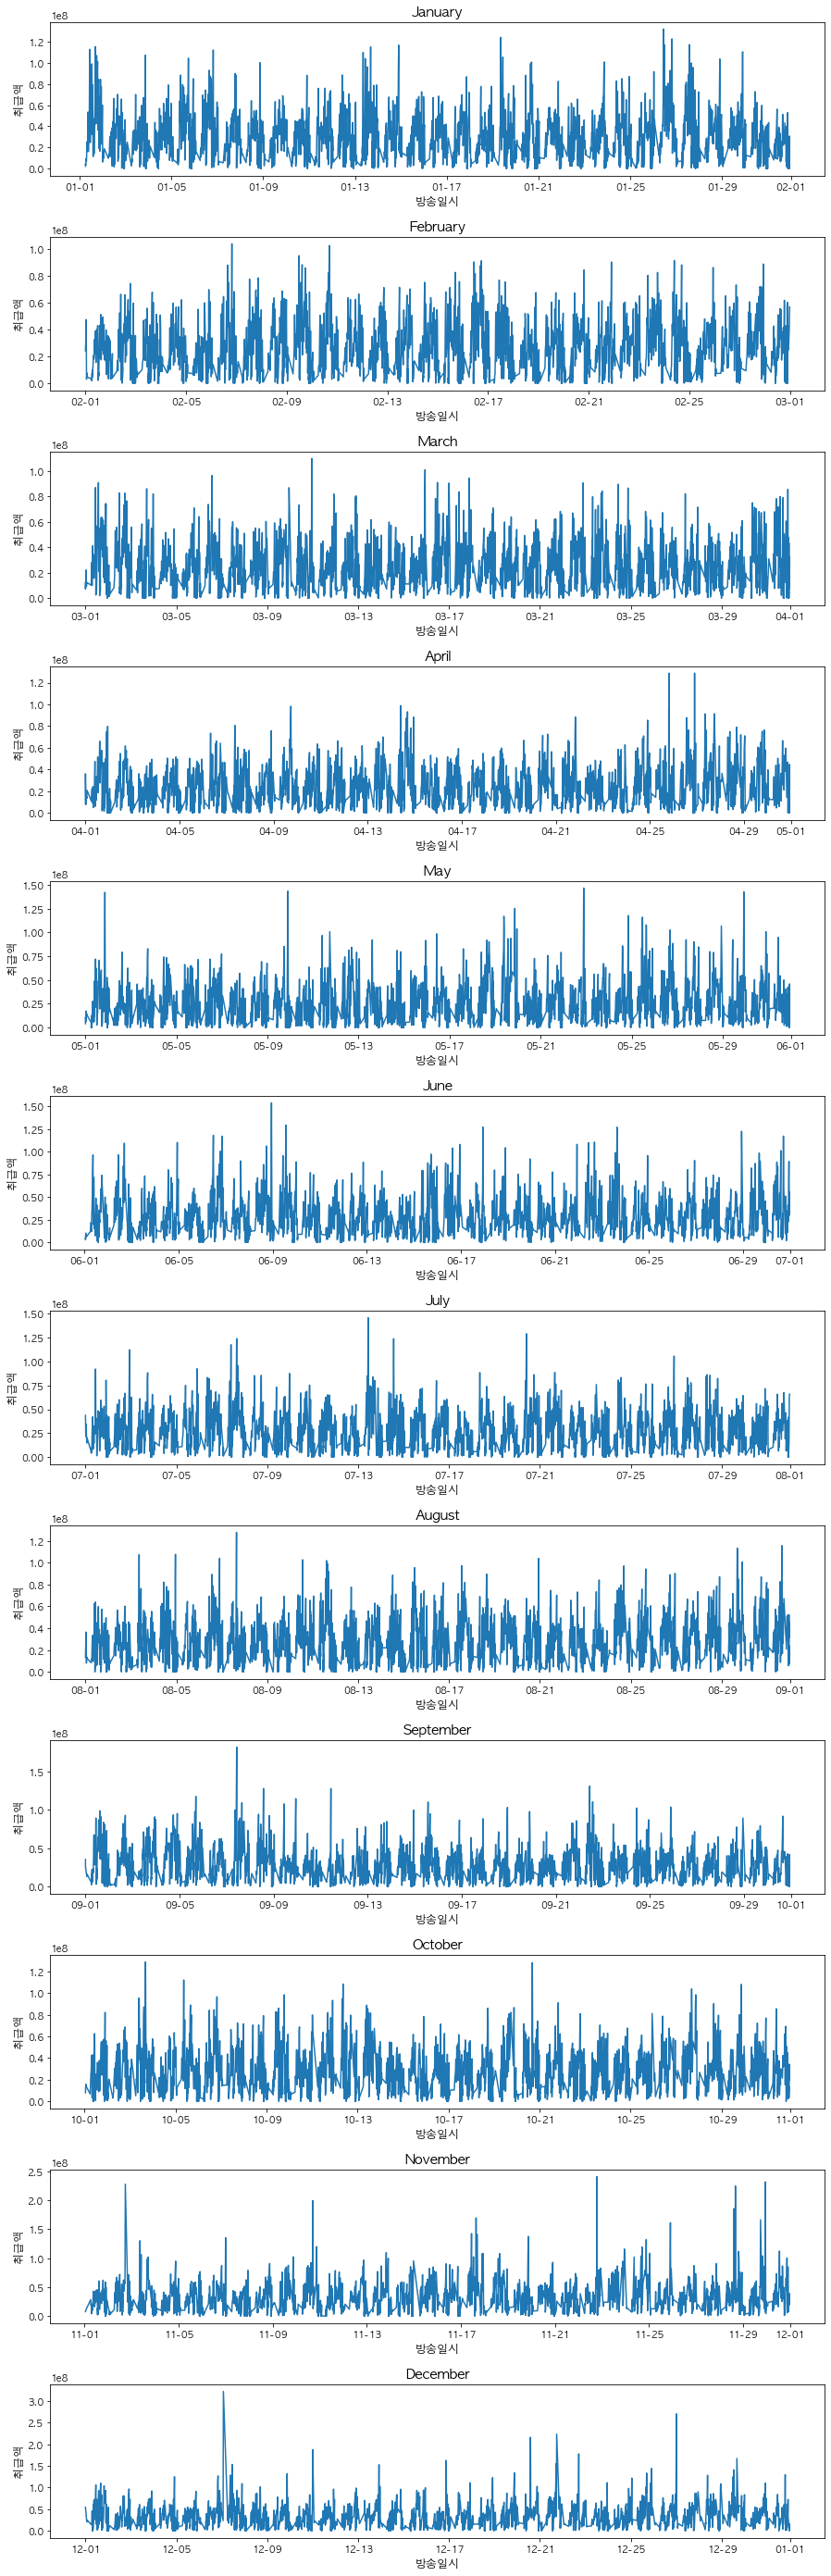

In [16]:
import calendar
from matplotlib.dates import DateFormatter


fig, axs = plt.subplots(nrows=12, ncols=1, figsize=(15,50))

for i, ax in enumerate(axs.flat):
    x = sales[(sales['방송일시'].dt.month == i+1) & (sales['방송일시'].dt.year == 2019)]['방송일시']
    y = sales[(sales['방송일시'].dt.month == i+1) & (sales['방송일시'].dt.year == 2019)]['취급액']
    ax.plot(x, y)
    ax.set_xlabel('방송일시', fontsize=12)
    ax.set_ylabel('취급액', fontsize=12)
    ax.set_title(calendar.month_name[i+1], fontsize=15)
    
    date_form = DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(date_form)

fig.subplots_adjust(hspace=0.4)

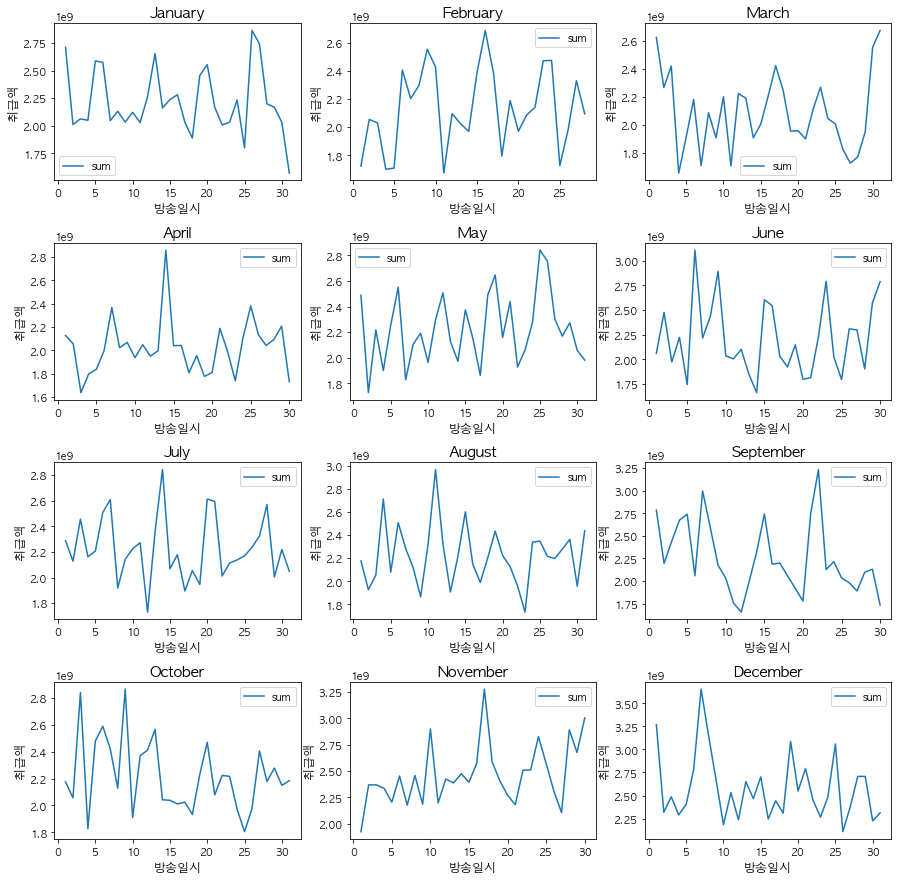

In [17]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,15))

for i, ax in enumerate(axs.flat):
    month_sales = sales[(sales['방송일시'].dt.month == i+1) & (sales['방송일시'].dt.year == 2019)]
    df_daily=month_sales.groupby(month_sales['방송일시'].dt.day).agg(['sum']).reset_index()
    df_daily.plot(x='방송일시', y='취급액', ax=ax)

    ax.set_xlabel('방송일시', fontsize=12)
    ax.set_ylabel('취급액', fontsize=12)
    ax.set_title(calendar.month_name[i+1], fontsize=15)

fig.subplots_adjust(hspace=0.4)
plt.show()

## 시청률에 대한 취급액 확인해보기

In [18]:
import datetime

sales2019 = sales[sales['방송일시'].dt.year == 2019]
sales2019['평균시청률'] = 0.0
sales2019['합시청률'] = 0.0

for i,row in sales2019.iterrows():
    date_time = row['방송일시']        
    date = date_time.strftime("%Y-%m-%d")
    start_time = date_time.strftime("%H:%M")
    exposed_time = row['노출(분)반올림']
            
    view_rate_sum = 0
    start_time_index = view_rate[date].index.get_loc(start_time)
    for index in range(exposed_time):
        view_rate_sum += view_rate[date][start_time_index+index]
    
    
    sales2019.at[i, '평균시청률'] = view_rate_sum/exposed_time
    sales2019.at[i, '합시청률'] = view_rate_sum

#     print('sum', view_rate_sum)
#     print('평균시청률', sales2019.at[i, '평균시청률'])
#     print('row', row['평균시청률'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [19]:
sales2019.head(20)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day,hour,minute,weekday,방송노출시간,방송날짜,holiday,판매량,노출(분)반올림,평균시청률,합시청률
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,6,0,1,20.0,2019-01-01,1,52.606516,20,0.00000,0.000
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,6,0,1,20.0,2019-01-01,1,109.548872,20,0.00000,0.000
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,6,20,1,40.0,2019-01-01,1,81.754386,20,0.00000,0.000
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,6,20,1,40.0,2019-01-01,1,174.310777,20,0.00000,0.000
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,6,40,1,60.0,2019-01-01,1,167.218045,20,0.00000,0.000
5,2019-01-01 06:40:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,9337000.0,1,1,6,40,1,60.0,2019-01-01,1,234.010025,20,0.00000,0.000
6,2019-01-01 07:00:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,6819000.0,1,1,7,0,1,20.0,2019-01-01,1,115.576271,20,0.00000,0.000
7,2019-01-01 07:20:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,15689000.0,1,1,7,20,1,40.0,2019-01-01,1,265.915254,20,0.00000,0.000
8,2019-01-01 07:40:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,25370000.0,1,1,7,40,1,60.0,2019-01-01,1,430.000000,20,0.00000,0.000
9,2019-01-01 08:00:00,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,16133000.0,1,1,8,0,1,20.0,2019-01-01,1,269.332220,20,0.00000,0.000


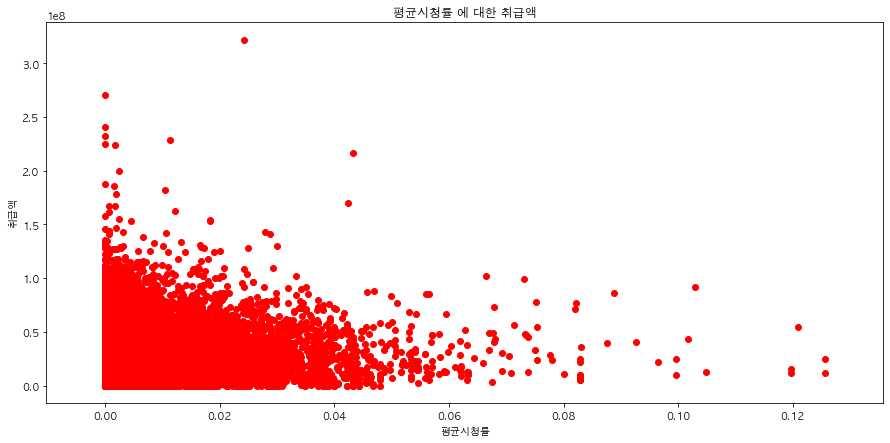

In [20]:
fig, ax = plt.subplots(figsize=(15,7))

ax.scatter(sales2019['평균시청률'], sales2019['취급액'], color='r')
ax.set_xlabel('평균시청률')
ax.set_ylabel('취급액')
ax.set_title('평균시청률 에 대한 취급액')
plt.show()

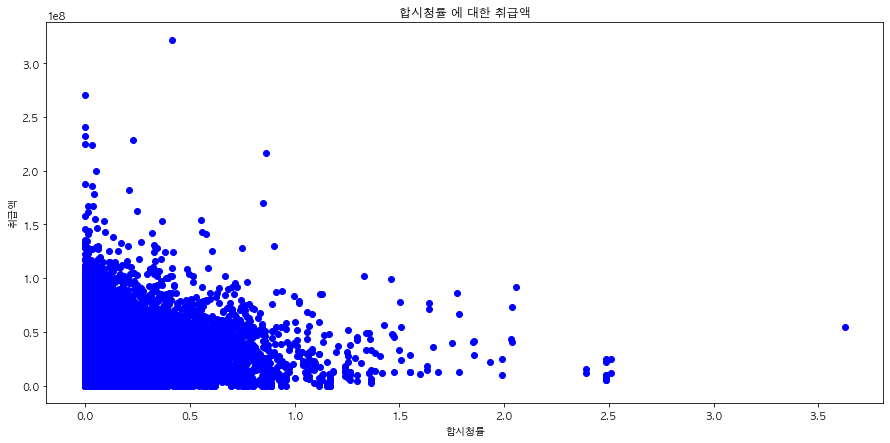

In [21]:
fig, ax = plt.subplots(figsize=(15,7))

ax.scatter(sales2019['합시청률'], sales2019['취급액'], color='b')
ax.set_xlabel('합시청률')
ax.set_ylabel('취급액')
ax.set_title('합시청률 에 대한 취급액')
plt.show()

## 카테고리별 조사

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe79769af10>,
      dtype=object)

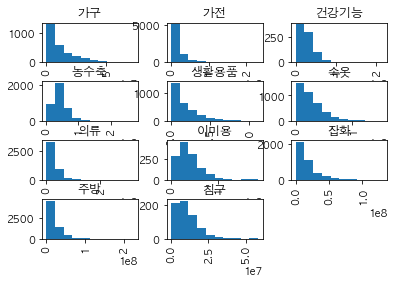

In [22]:
sales.취급액.hist(by=sales.상품군)

In [23]:
# df = sales.groupby('상품군')['취급액'].agg('count')
sales.상품군.value_counts()

주방      6604
가전      6479
의류      4340
속옷      3919
잡화      3891
농수축     3884
생활용품    2877
가구      2614
이미용     1305
건강기능     790
침구       669
Name: 상품군, dtype: int64

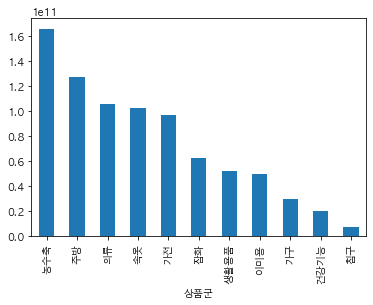

In [24]:
sales.groupby(['상품군'])['취급액'].sum().sort_values(ascending=False).plot.bar()

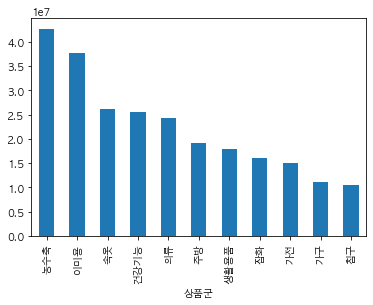

In [25]:
sales.groupby(['상품군'])['취급액'].mean().sort_values(ascending=False).plot.bar()

In [26]:
sales.groupby(['month', '상품군']).sum()['취급액'].unstack()

상품군,가구,가전,건강기능,농수축,생활용품,속옷,의류,이미용,잡화,주방,침구
month,,,,,,,,,,,
1,NaN,7.438032e+09,1.208088e+09,2.053628e+10,2.561073e+09,1.049650e+10,8.508143e+09,3.456610e+09,1.887322e+09,1.282946e+10,NaN
2,2.734201e+09,9.631532e+09,1.136406e+09,1.201721e+10,3.123047e+09,6.631356e+09,6.320186e+09,2.982287e+09,3.810956e+09,1.119420e+10,NaN
3,3.158537e+09,9.179687e+09,1.463311e+09,7.583698e+09,5.323272e+09,1.018275e+10,1.113156e+10,1.935054e+09,5.304263e+09,9.366468e+09,NaN
4,3.147489e+09,1.028161e+10,7.976930e+08,6.923465e+09,2.574679e+09,9.043216e+09,9.564433e+09,2.300892e+09,3.531334e+09,1.238176e+10,2.322890e+08
5,2.792087e+09,1.253566e+10,1.106787e+09,9.772354e+09,1.936412e+09,1.110494e+10,1.132289e+10,2.287170e+09,6.342567e+09,8.772368e+09,9.268420e+08
6,2.774906e+09,6.142751e+09,2.747047e+09,9.212766e+09,1.681500e+09,1.387210e+10,1.079362e+10,2.183696e+09,4.185027e+09,1.040034e+10,2.343745e+09
7,2.410298e+09,7.766392e+09,1.917653e+09,1.442284e+10,2.278725e+09,9.103320e+09,7.997335e+09,3.179406e+09,6.891175e+09,1.099395e+10,2.054010e+09
8,2.574831e+09,7.096125e+09,9.935900e+08,2.098538e+10,3.918999e+09,8.444598e+09,7.519610e+09,2.071920e+09,5.807021e+09,9.461286e+09,1.385900e+08
9,3.025282e+09,5.531266e+09,1.875143e+09,1.873170e+10,4.126477e+09,3.541833e+09,7.032450e+09,4.824076e+09,8.776263e+09,9.867296e+09,1.373200e+08


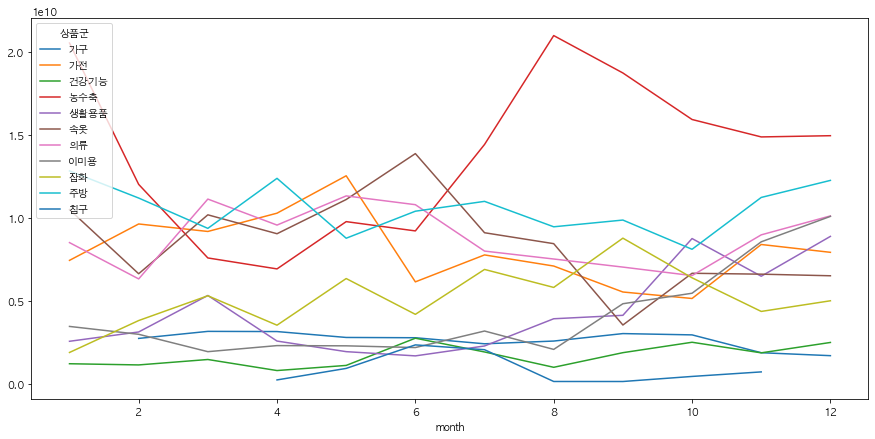

In [27]:
fig, ax = plt.subplots(figsize=(15,7))
sales.groupby(['month', '상품군']).sum()['취급액'].unstack().plot(ax=ax)

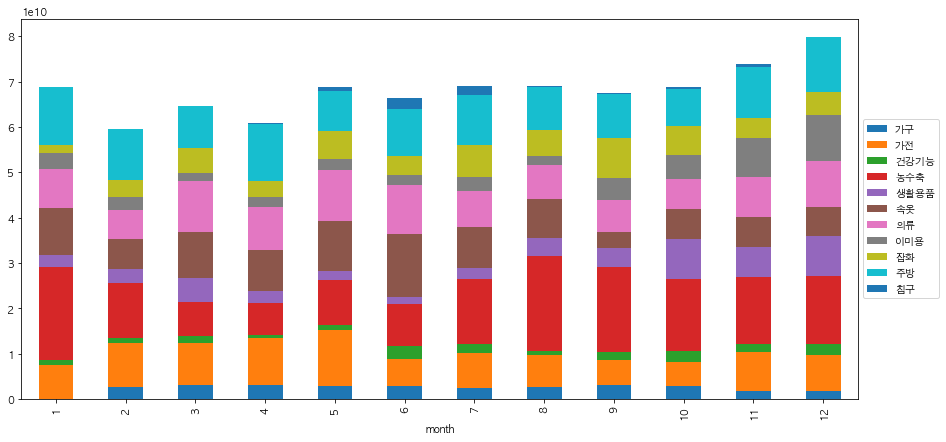

In [28]:
fig, ax = plt.subplots(figsize=(15,7))
sales.groupby(['month', '상품군']).sum()['취급액'].unstack().plot(kind='bar',stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

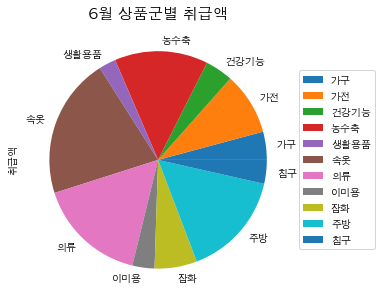

In [29]:
# 6월 데이터 카테고리별 판매량
june = sales['month'] == 6
june_sales = sales[june]
fig, ax = plt.subplots(figsize=(10,5))
june_sales.groupby(['상품군']).sum()['취급액'].plot(kind='pie', ax=ax)
ax.set_title('6월 상품군별 취급액', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

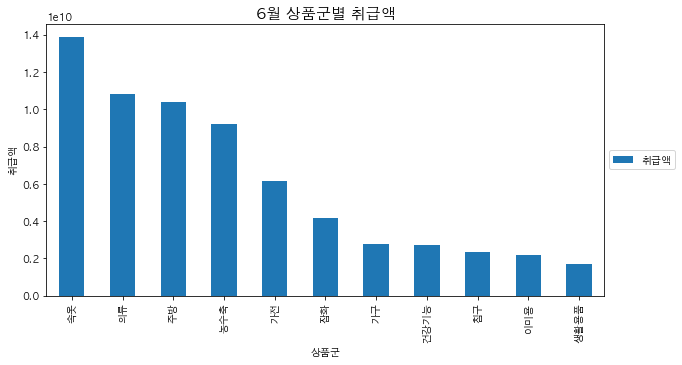

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
june_sales.groupby(['상품군']).sum()['취급액'].sort_values(ascending=False).plot(kind='bar')
ax.set_ylabel('취급액')
ax.set_title('6월 상품군별 취급액', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

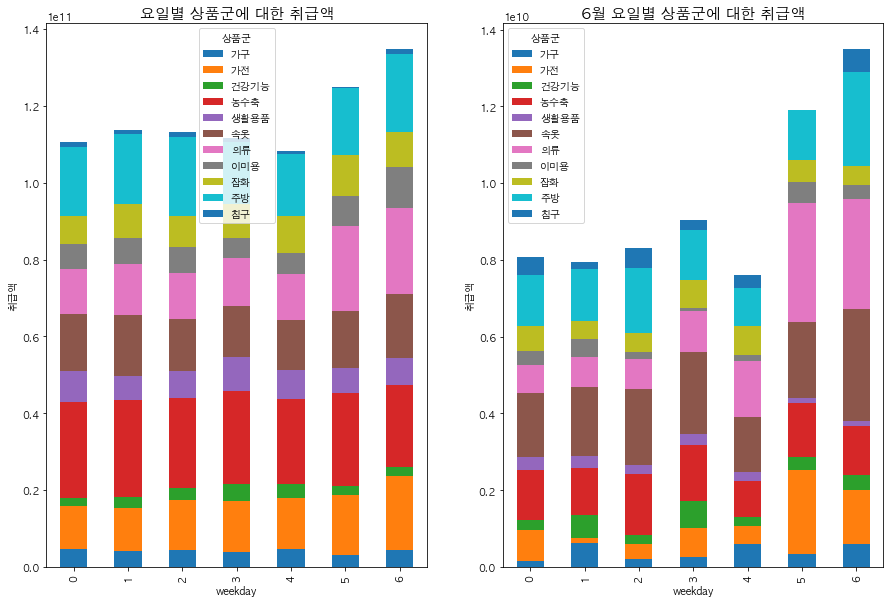

In [31]:
fig, axs = plt.subplots(1,2,figsize=(15,10))
sales.groupby(['weekday', '상품군']).sum()['취급액'].unstack().plot(kind='bar',stacked=True, ax=axs[0])
axs[0].set_ylabel('취급액')
axs[0].set_title('요일별 상품군에 대한 취급액', fontsize=15)
june_sales.groupby(['weekday', '상품군']).sum()['취급액'].unstack().plot(kind='bar',stacked=True, ax=axs[1])
axs[1].set_ylabel('취급액')
axs[1].set_title('6월 요일별 상품군에 대한 취급액', fontsize=15)
plt.show()

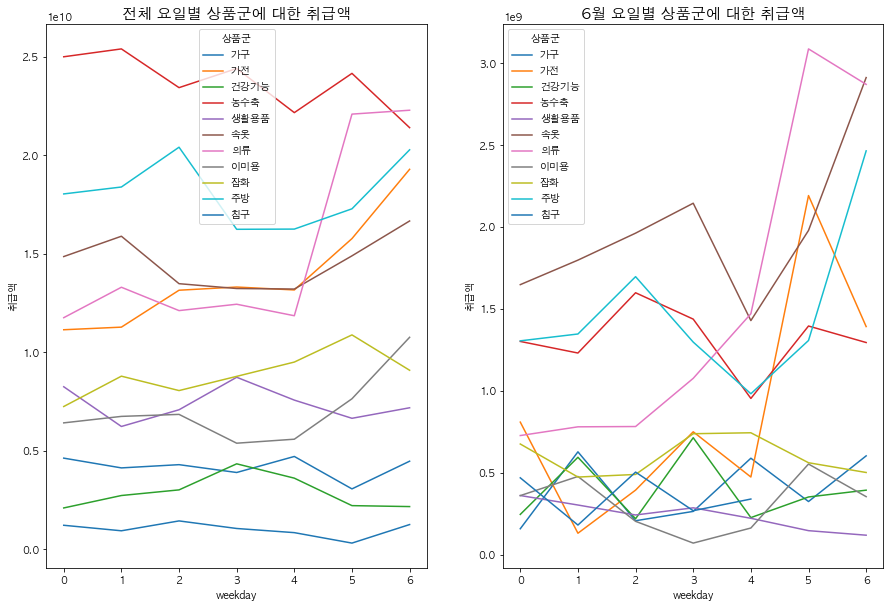

In [32]:
fig, axs = plt.subplots(1,2,figsize=(15,10))
sales.groupby(['weekday', '상품군']).sum()['취급액'].unstack().plot(ax=axs[0])
axs[0].set_ylabel('취급액')
axs[0].set_title('전체 요일별 상품군에 대한 취급액', fontsize=15)
june_sales.groupby(['weekday', '상품군']).sum()['취급액'].unstack().plot(ax=axs[1])
axs[1].set_ylabel('취급액')
axs[1].set_title('6월 요일별 상품군에 대한 취급액', fontsize=15)
plt.show()

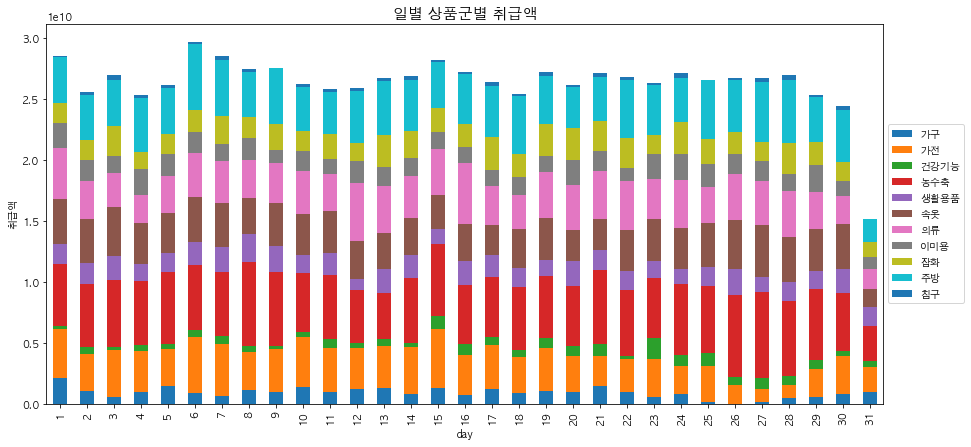

In [33]:
fig, ax = plt.subplots(figsize=(15,7))
sales.groupby(['day', '상품군']).sum()['취급액'].unstack().plot(kind='bar',stacked=True, ax=ax)
ax.set_ylabel('취급액')
ax.set_title('일별 상품군별 취급액', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### 일별로 전체 총 취급액에 대한 변화는 미미함

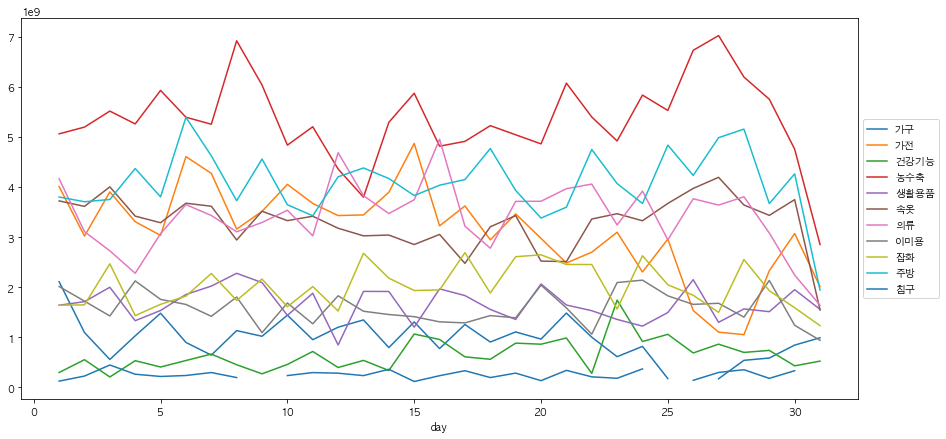

In [34]:
fig, ax = plt.subplots(figsize=(15,7))
sales.groupby(['day', '상품군']).sum()['취급액'].unstack().plot(ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### 매일 농수축이 가장 많이 팔림

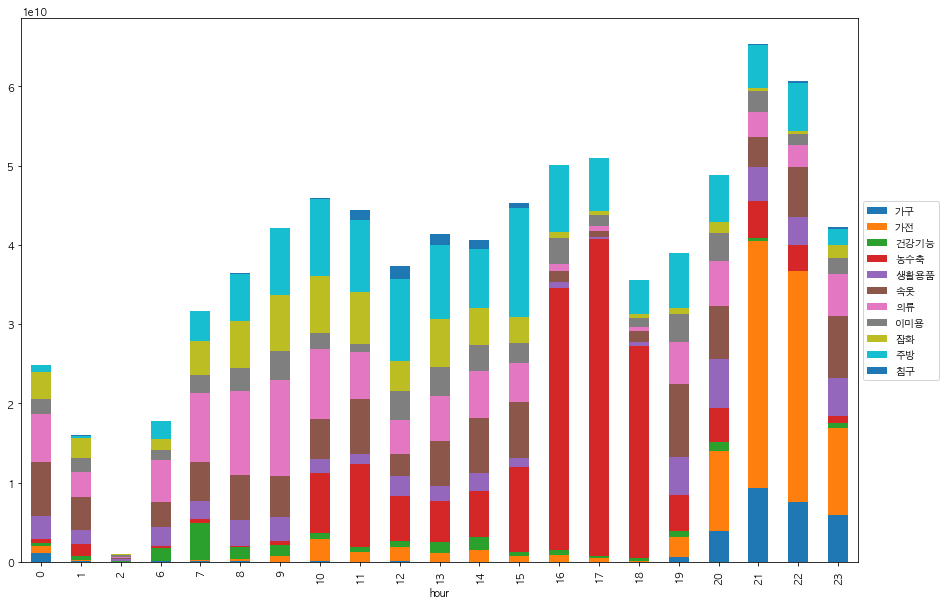

In [74]:
fig, ax = plt.subplots(figsize=(15,10))
sales.groupby(['hour', '상품군'])['취급액'].sum().unstack().plot(kind='bar',stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### 9시-10시에 총 취급액이 가장 높음

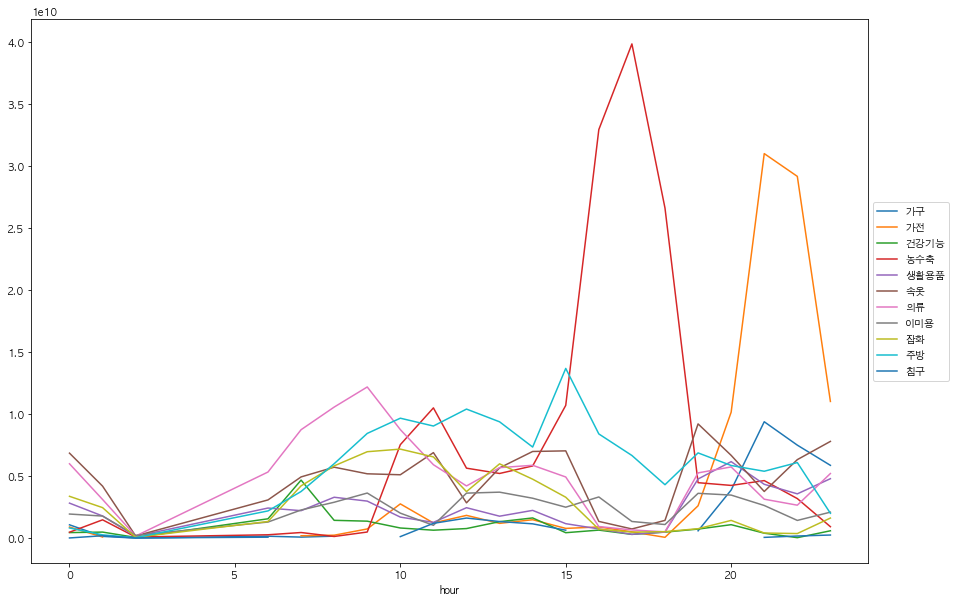

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
sales.groupby(['hour', '상품군']).sum()['취급액'].unstack().plot(ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### 뚜렷히 보이는 트렌드는 농수축이 4시부터 판매량이 급격이 증가하여  7시쯤까지 줄어든다.
### 가전은 8시이후에 대부분 팔림

### 6월 시간별 트렌드

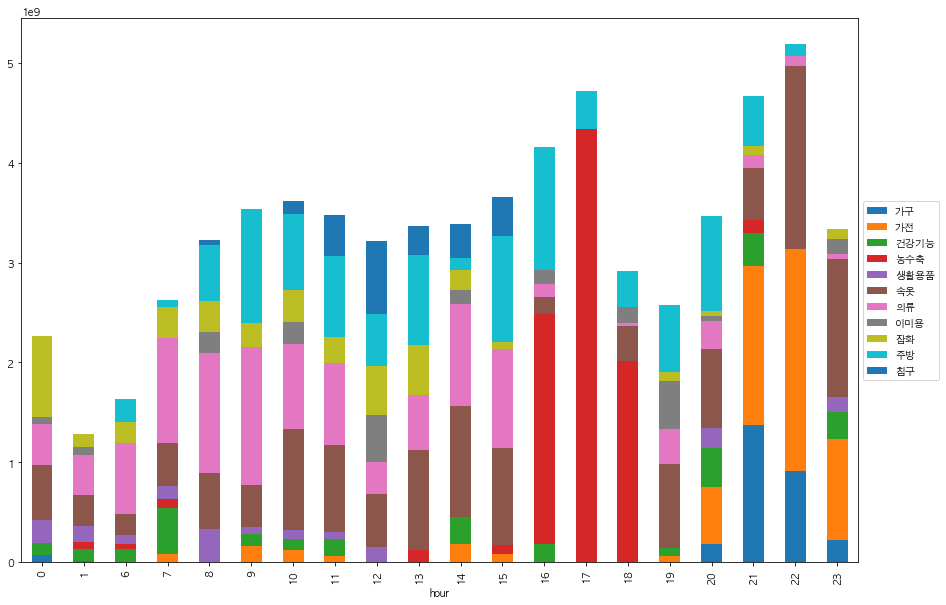

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
june_sales.groupby(['hour', '상품군']).sum()['취급액'].unstack().plot(kind='bar',stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

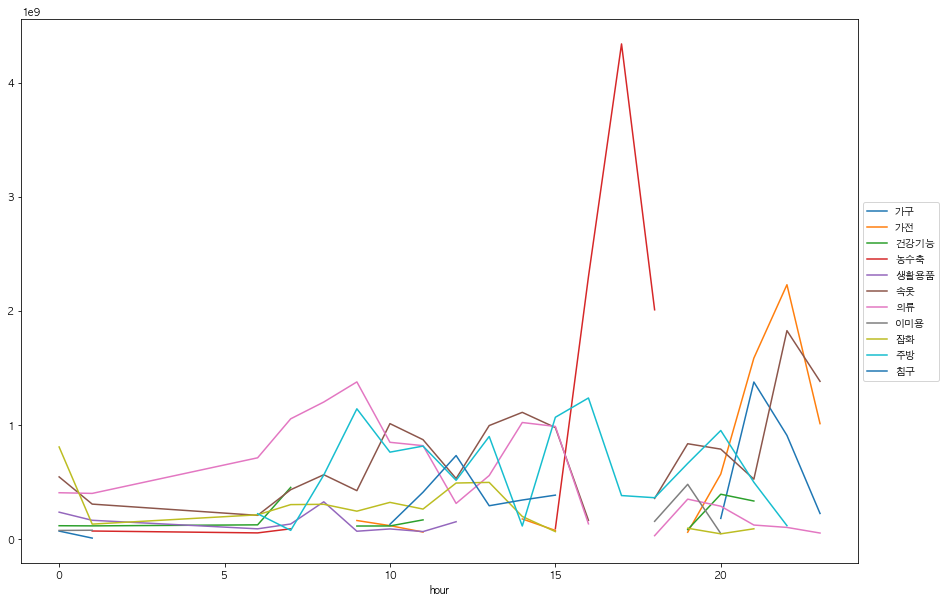

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
june_sales.groupby(['hour', '상품군']).sum()['취급액'].unstack().plot(ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [39]:
# fig, ax = plt.subplots(figsize=(15,10))
# sales.groupby(['노출(분)']).sum()['취급액']
# sales['노출(분)'] = sales['노출(분)'].round()
sales['노출(분)'].sort_values().unique()
# sales.groupby(['노출(분)','상품군']).sum()['취급액'].unstack().plot(kind='bar',stacked=True, ax=ax)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

array([ 2.46666667,  2.81666667,  3.        ,  3.16666667,  3.28333333,
        3.45      ,  5.16666667,  5.33333333,  5.46666667,  6.63333333,
        6.66666667,  6.68333333,  6.85      ,  7.26666667,  8.85      ,
        9.7       , 10.        , 10.96666667, 11.03333333, 11.33333333,
       12.        , 12.13333333, 12.5       , 12.53333333, 12.66666667,
       12.9       , 13.        , 13.16666667, 13.33333333, 13.5       ,
       14.35      , 14.66666667, 14.7       , 14.83333333, 14.98333333,
       15.        , 15.01666667, 15.03333333, 15.06666667, 15.08333333,
       15.16666667, 15.2       , 15.25      , 15.33333333, 15.36666667,
       15.5       , 15.66666667, 15.83333333, 15.85      , 15.86666667,
       16.        , 16.01666667, 16.03333333, 16.05      , 16.08333333,
       16.1       , 16.16666667, 16.2       , 16.33333333, 16.35      ,
       16.51666667, 16.66666667, 16.68333333, 16.7       , 16.83333333,
       16.85      , 16.86666667, 16.96666667, 17.08333333, 17.1 

In [40]:
sales['노출(분)'].value_counts().sort_index()

2.466667        1
2.816667        1
3.000000        2
3.166667        1
3.283333        1
             ... 
27.083333       1
29.983333       1
30.000000    1931
30.100000     693
40.000000       2
Name: 노출(분), Length: 102, dtype: int64

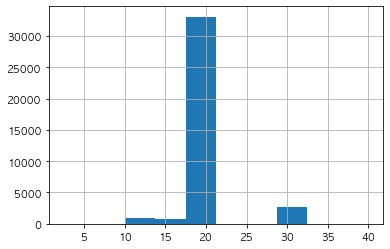

In [41]:
sales['노출(분)'].hist()

In [42]:
sales.groupby(['month','상품군']).size()

month  상품군 
1      가전      570
       건강기능     63
       농수축     458
       생활용품     83
       속옷      389
              ... 
12     속옷      282
       의류      330
       이미용     213
       잡화      295
       주방      491
Length: 127, dtype: int64

In [43]:
# 상품명 여성/남성 분석

def sales_by_sex(category_name, df):

    f_exist, m_exist = False, False
    f_time, m_time = None, None
    f_code, m_code = None, None
    f_sales, m_sales = 0,0
    f_total, m_total = 0,0

    t_count = 0
    count = 0
    
    for i,row in df.iterrows():


        if '여성' in row['상품명']:
            f_name = row['상품명']
            f_time = row['방송일시']
            f_code = row['마더코드']
            f_sales = row['취급액']
            f_exist = True


        elif '남성' in row['상품명']:
            m_name = row['상품명']
            m_time = row['방송일시']
            m_code = row['마더코드']
            m_sales = row['취급액']
            m_exist = True 


        if (f_exist and m_exist) & (f_time == m_time) & (f_code == m_code):
            t_count +=1
            if m_sales > f_sales:
                count+=1
#                 print(m_name + ": " + str(m_time) + " " + str(m_code) + " " + str(m_sales))
#                 print(f_name + ": " + str(f_time) + " " + str(f_code) + " " + str(f_sales))

            f_total += f_sales
            m_total += m_sales
            f_exist, m_exist = False, False
            f_sales, m_sales = 0, 0

    print('{} 총 판매액: 남성 {} 여성 {}'.format(category_name, m_total, f_total))
    print('total: {}, m_count: {}'.format(t_count, count))

    
# sales_by_sex("속옷", sales[sales['상품군'] == '속옷'])  
sales_by_sex("의류", sales[sales['상품군'] == '의류'])
# sales_by_sex("농수축", sales[sales['상품군'] == '농수축'])  
# sales_by_sex("주방", sales[sales['상품군'] == '주방'])  
# sales_by_sex("잡화", sales[sales['상품군'] == '잡화'])  
# sales_by_sex("전체", sales)

의류 총 판매액: 남성 18661658000.0 여성 14490874000.0
total: 980, m_count: 674


In [44]:
속옷총취급액 = sales[sales['상품군'] == '속옷']['취급액'].sum()
(3095445000.0+1627646000.0)/속옷총취급액

0.04621578852391416

In [45]:
의류총취급액 = sales[sales['상품군'] == '의류']['취급액'].sum()
(18661658000.0+14490874000.0)/의류총취급액

0.3133416437981755

In [46]:
(18661658000.0-14490874000.0)/(18661658000.0+14490874000.0)

0.12580589621329677

In [47]:
# 의류에 상품명은 몇개 있나 확인

clothing = sales[sales['상품군'] == '의류']
print(clothing.shape)
clothing['상품명'].unique().size

# 전체 올라온 상품 4340개 (중복포함)
# 팔린 상품 281개

(4340, 18)


281

In [48]:
clothing.head(20)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day,hour,minute,weekday,방송노출시간,방송날짜,holiday,판매량,노출(분)반올림
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,6,0,1,20.0,2019-01-01,1,52.606516,20
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,6,0,1,20.0,2019-01-01,1,109.548872,20
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,6,20,1,40.0,2019-01-01,1,81.754386,20
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,6,20,1,40.0,2019-01-01,1,174.310777,20
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,6,40,1,60.0,2019-01-01,1,167.218045,20
5,2019-01-01 06:40:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,9337000.0,1,1,6,40,1,60.0,2019-01-01,1,234.010025,20
9,2019-01-01 08:00:00,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,16133000.0,1,1,8,0,1,20.0,2019-01-01,1,269.332220,20
10,2019-01-01 08:20:00,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,30061000.0,1,1,8,20,1,40.0,2019-01-01,1,501.853088,20
11,2019-01-01 08:40:00,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,53542000.0,1,1,8,40,1,60.0,2019-01-01,1,893.856427,20
12,2019-01-01 09:00:00,20.0,100816,202404,보코 리버시블 무스탕,의류,79000,16075000.0,1,1,9,0,1,20.0,2019-01-01,1,203.481013,20


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
sales["cat_code"] = lb_make.fit_transform(sales["상품군"])
sales[["상품군", "cat_code"]].head(20)


,상품군,cat_code
0,의류,6
1,의류,6
2,의류,6
3,의류,6
4,의류,6
5,의류,6
6,속옷,5
7,속옷,5
8,속옷,5
9,의류,6


# 다양한 모델 적용해보기
## 1. Linear Regression
## 2. LGBM
## 3. XGBoost
## 4. RandomForest
## 5. Time series model?

In [78]:
from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [66]:
# Dataset
X = sales[['판매단가', '노출(분)','cat_code']].values.reshape(-1,3)
y = sales['취급액'].values

In [67]:
# linear regression
model = LinearRegression()
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -14426969.557 (149694.084)


In [68]:
# LGBM
model = LGBMRegressor()
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -10722668.576 (157657.028)


In [79]:
# XGBoost
model = XGBRegressor(objective='reg:squarederror')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -11785983.651 (200272.437)


In [80]:
# Random Forest
model = RandomForestRegressor(max_depth=2, random_state=0)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -13308853.201 (192923.051)


In [81]:
sales['취급액'].mean()

21870391.897677407

#### 한꺼번에 돌리고 싶을때

In [91]:
models = {
        'Linear Regression': LinearRegression(),
        'LGBM': LGBMRegressor(),
        'XGBoost': XGBRegressor(objective='reg:squarederror'),
        'Random Forest': RandomForestRegressor(max_depth=2, random_state=0)
}
for key, value in models.items():
    print(key)
    model = value
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    n_scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print('R2: {:.2f}'.format(mean(n_scores)))

Linear Regression
MAE: -14426969.557 (149694.084)
R2: 0.09
LGBM
MAE: -10722668.576 (157657.028)
R2: 0.42
XGBoost
MAE: -11798136.810 (180416.733)
R2: 0.33
Random Forest
MAE: -13308853.201 (192923.051)
R2: 0.18
